In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

df = pd.read_csv('log.txt', sep='\t', header=0, skiprows = [1])
df

,Tempo,RPM_1,WOW,HP,VCAS,XGPS,YGPS,ZGPS,MagHead,AIL,NZ,THETA,PHI,DAlvo,TBase,Unnamed: 15
0,62397.017,0.0,0.0,1799.088,0.381,0.000,0.000,573.0,131.906,1.566,-1.014,-6.812,3.300,0.000,-1.339,NaN
1,62397.118,0.0,0.0,1798.621,0.381,0.000,0.000,573.0,132.647,1.662,-1.004,-6.706,3.328,42.317,-1.510,NaN
2,62397.213,0.0,0.0,1798.981,0.381,0.000,0.000,573.0,106.280,1.566,-1.012,-6.724,3.309,42.317,-1.378,NaN
3,62397.294,0.0,0.0,1799.158,0.381,0.000,0.000,573.0,132.879,1.789,-1.005,-6.717,3.273,42.317,-1.313,NaN
4,62397.389,0.0,0.0,1798.478,0.381,-0.380,-0.000,573.0,132.236,1.566,-1.007,-6.765,3.305,42.266,-1.562,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,62923.493,0.0,0.0,1822.371,0.271,3.614,-18.881,577.5,137.816,1.949,-1.005,-7.923,2.695,61.525,7.177,NaN
5877,62923.574,0.0,0.0,1822.371,0.271,3.614,-18.881,577.5,138.262,2.077,-1.013,-7.937,2.758,61.525,7.177,NaN
5878,62923.651,0.0,0.0,1820.667,0.000,3.614,-18.881,577.5,131.106,1.821,-1.006,-7.954,2.779,61.525,6.554,NaN
5879,62923.746,0.0,0.0,1817.990,0.000,3.614,-18.881,577.5,134.427,1.981,-1.010,-7.966,2.750,61.525,5.575,NaN


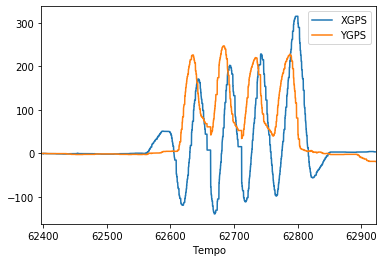

In [2]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='XGPS',ax=ax)
df.plot(kind='line',x='Tempo',y='YGPS',ax=ax)

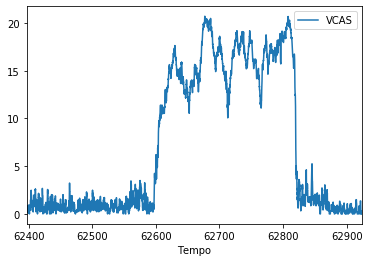

In [3]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='VCAS',ax=ax)

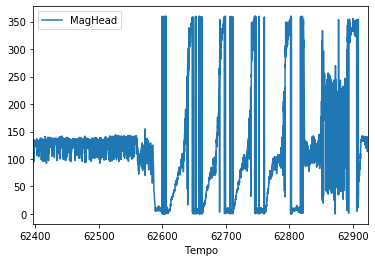

In [4]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='MagHead',ax=ax)

In [5]:
ultimoTempo = 62397.017
ultimoGpsX = 0

pospredictX = 0
pospredictY = 0

XpredVetor = []
YpredVetor = []

def deadreckon(gpsx, gpsy, maghead, vcas, tempoAtual):
    # GPS atualizou
    global ultimoGpsX
    global pospredictX
    global pospredictY
    global ultimoTempo
    
    if(ultimoGpsX != gpsx):
        pospredictX = gpsx
        pospredictY = gpsy
        ultimoGpsX = gpsx
        #print('GPS mudou')
    # Se o GPS ainda não atualizou
    else:
        pospredictX = pospredictX - cos(maghead*pi/180)*vcas*(tempoAtual-ultimoTempo)
        pospredictY = pospredictY + sin(maghead*pi/180)*vcas*(tempoAtual-ultimoTempo)
    ultimoTempo = tempoAtual
    
    return pospredictX, pospredictY

# Itera em cada linha
for i, row in df.iterrows():
    x, y = deadreckon(row['XGPS'], row['YGPS'], row['MagHead'], row['VCAS'], row['Tempo'])
    XpredVetor.append(x)
    YpredVetor.append(y)
    
df.insert (df.shape[1]-1, 'Xpred', XpredVetor)
df.insert (df.shape[1]-1, 'Ypred', YpredVetor)



(62620, 62650)

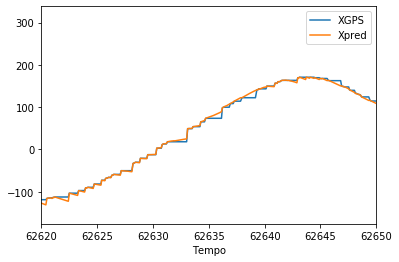

In [6]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='XGPS',ax=ax)
df.plot(kind='line',x='Tempo',y='Xpred',ax=ax)
ax.set_xlim(62620, 62650)

(62620, 62650)

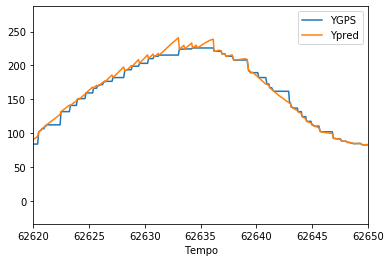

In [7]:
ax = plt.gca()

df.plot(kind='line',x='Tempo',y='YGPS',ax=ax)
df.plot(kind='line',x='Tempo',y='Ypred',ax=ax)
ax.set_xlim(62620, 62650)

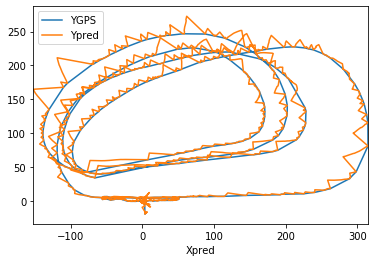

In [8]:
ax = plt.gca()
df.plot(kind='line',x='XGPS',y='YGPS',ax=ax)
df.plot(kind='line',x='Xpred',y='Ypred',ax=ax)

(62620, 62650)

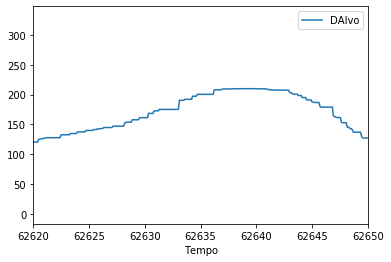

In [9]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='DAlvo',ax=ax)
ax.set_xlim(62620, 62650)

In [10]:
# ultimoTempo = 62397.017
# ultimoDistAlvoGPS = 0
# sinalPredict = 1
# distAlvoPredict = 0

# distAlvoPred = []

# def deadreckon1d(distAlvoGPS, vcas, tempoAtual):
#     # GPS atualizou
#     global ultimoDistAlvoGPS
#     global ultimoTempo
#     global distAlvoPredict
#     global sinalPredict
    
    
#     if(ultimoDistAlvoGPS != distAlvoGPS):
#         distAlvoPredict = distAlvoGPS
#         if(ultimoDistAlvoGPS > distAlvoGPS):
#             sinalPredict = -1
#         else:
#             sinalPredict = 1
#         ultimoDistAlvoGPS = distAlvoGPS

#     # Se o GPS ainda não atualizou
#     else:
#         distAlvoPredict = distAlvoPredict + sinalPredict*vcas*(tempoAtual-ultimoTempo)
#     ultimoTempo = tempoAtual
#     return distAlvoPredict

# # Itera em cada linha
# for i, row in df.iterrows():
#     d = deadreckon1d(row['DAlvo'], row['VCAS'], row['Tempo'])
#     distAlvoPred.append(d)
    
# df.insert (df.shape[1]-1, 'DistAlvoPred', distAlvoPred)

In [11]:
# ax = plt.gca()
# df.plot(kind='line',x='Tempo',y='DAlvo',ax=ax)
# df.plot(kind='line',x='Tempo',y='DistAlvoPred',ax=ax)
# ax.set_xlim(62690, 62710)

In [12]:
from ITA_DeadReckoning import ITA_DeadReckoning

posPitot = ITA_DeadReckoning()
distAlvoPred = []

# Itera em cada linha
for i, row in df.iterrows():
    d = posPitot.estimaPosi(row['DAlvo'], row['VCAS'], row['Tempo'])
    distAlvoPred.append(d)
    
df.insert (df.shape[1]-1, 'DistAlvoPred', distAlvoPred)

(-100, 500)

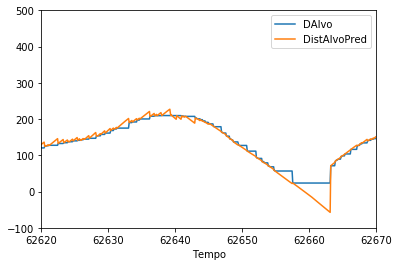

In [18]:
ax = plt.gca()
df.plot(kind='line',x='Tempo',y='DAlvo',ax=ax)
df.plot(kind='line',x='Tempo',y='DistAlvoPred',ax=ax)
ax.set_xlim(62620, 62670)
ax.set_ylim(-100, 500)